## Import Important Libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functions.fisher_score import fisher_index_calc
from sklearn.metrics import accuracy_score, make_scorer
from functions.plot_confusion_matrix import plot_confusion_matrix
import math, random

## Task 1: Data Preprocessing

Load the given data in the 'Data' folder and analyse the data and solve the following questions.

1. What is the sample size ?
2. Is data labeled? If yes print the labeles of the data.
3. Check the features and type of data. 
4. Plot the data distribution of Features towards labels.

In [31]:
# Load the data from csv to Pandas Dataframe

data = np.loadtxt("Data/sensor_readings_24.csv", delimiter=',', dtype=str)

df = pd.DataFrame(data[:,:24], dtype=np.float64)
df = pd.concat([df, pd.DataFrame(data[:, 24], columns=['Label'])], axis=1)

In [32]:
# verify the data by printing the sample data and its shape
print("Size of the Data:", df.shape)
print ("Sample Data:\n", df.head(n=10))
df.iloc[:, 0:24]
df['Label']

Size of the Data: (5456, 25)
Sample Data:
        0      1      2      3    4      5      6      7      8      9  ...  \
0  0.438  0.498  3.625  3.645  5.0  2.918  5.000  2.351  2.332  2.643  ...   
1  0.438  0.498  3.625  3.648  5.0  2.918  5.000  2.637  2.332  2.649  ...   
2  0.438  0.498  3.625  3.629  5.0  2.918  5.000  2.637  2.334  2.643  ...   
3  0.437  0.501  3.625  3.626  5.0  2.918  5.000  2.353  2.334  2.642  ...   
4  0.438  0.498  3.626  3.629  5.0  2.918  5.000  2.640  2.334  2.639  ...   
5  0.439  0.498  3.626  3.629  5.0  2.918  5.000  2.633  2.334  2.645  ...   
6  0.440  5.000  3.627  3.628  5.0  2.919  3.028  2.346  2.330  2.638  ...   
7  0.444  5.021  3.631  3.634  5.0  2.919  5.000  2.626  2.327  2.638  ...   
8  0.451  5.025  3.635  3.639  5.0  2.920  3.027  2.620  2.323  2.632  ...   
9  0.458  5.022  3.640  3.644  5.0  2.922  5.000  2.346  2.321  2.628  ...   

      15     16     17     18     19     20     21     22     23  \
0  0.593  0.502  0.493  0.504 

0       Slight-Right-Turn
1       Slight-Right-Turn
2       Slight-Right-Turn
3       Slight-Right-Turn
4       Slight-Right-Turn
              ...        
5451         Move-Forward
5452     Sharp-Right-Turn
5453     Sharp-Right-Turn
5454         Move-Forward
5455     Sharp-Right-Turn
Name: Label, Length: 5456, dtype: object

### Verify the data distribution and check for the following.

1. Is normalization required ?
2. What do you observe from the data about data distribution and asses if data is balanced?
3. What do you think that is needed further by analysing the data ? 

In [33]:
# Tabulate the sample data set using describe function and analyse. 
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.471617,2.327043,2.489347,2.796501,2.958552,2.893073,3.351113,2.540397,3.125621,2.832386,...,2.205772,1.202111,0.989831,0.910273,1.05811,1.076320,1.015923,1.778034,1.555045,1.578508
std,0.802801,1.410146,1.247435,1.309368,1.339225,1.282575,1.413692,1.111554,1.356965,1.307843,...,1.715435,1.098568,0.942075,0.889527,1.14463,1.141498,0.887439,1.571686,1.291447,1.150480
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.354000,0.34000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.921000,1.362000,1.538750,1.731000,1.774000,1.785750,1.930750,1.618000,1.799750,1.636000,...,0.860000,0.690000,0.581000,0.529750,0.52300,0.541750,0.567000,0.743000,0.792000,0.884000
50%,1.335000,1.904500,2.064000,2.458000,2.667000,2.682500,3.225500,2.172000,2.802000,2.679000,...,1.328500,0.803000,0.738000,0.685000,0.69100,0.693000,0.764000,1.030500,1.071000,1.289000
75%,1.814000,2.681500,2.739250,4.093500,4.314500,3.835250,5.000000,3.193000,5.000000,3.526250,...,4.436250,1.159000,0.913000,0.837000,0.85700,0.863000,1.002250,2.068250,1.559500,1.657250
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [34]:
df.groupby(['Label']).count()[0]

Label
Move-Forward         2205
Sharp-Right-Turn     2097
Slight-Left-Turn      328
Slight-Right-Turn     826
Name: 0, dtype: int64

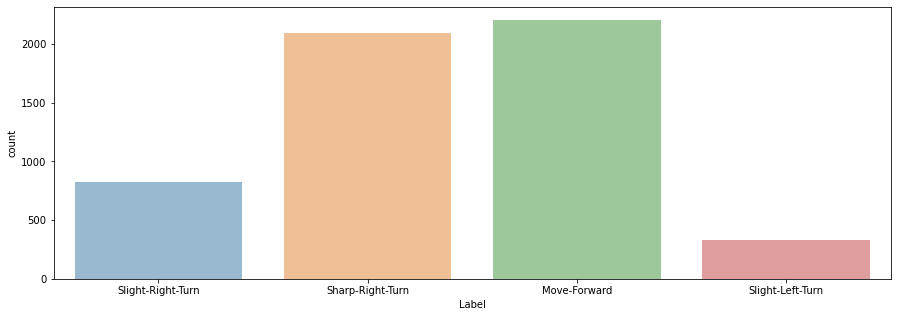

In [35]:
# Plot the data distribution using SNS countplot

fig = plt.figure(figsize=(15,5))
axis = sns.countplot(x='Label',data=df,alpha=0.5)

# Task 2: Feature Selection

## Little bit of Theory about  Feature Selection
Different types of Feature Selection methods:  
<img src="figures/feature_selection_methods.png">  
Source: Medium.com

#### Correlation Statistics  
The scikit-learn library provides an implementation of most of the useful statistical measures.  
For example:  
1. Pearson’s Correlation Coefficient: f_regression()  
2. ANOVA: f_classif()  
3. Chi-Squared: chi2()  
4. Mutual Information: mutual_info_classif() and mutual_info_regression()  
Also, the SciPy library provides an implementation of many more statistics, such as Kendall’s tau (kendalltau) and Spearman’s rank correlation (spearmanr).
#### Selection Method
The scikit-learn library also provides many different filtering methods once statistics have been calculated for each input variable with the target.
Two of the more popular methods include:
1. Select the top k variables: SelectKBest
2. Select the top percentile variables: SelectPercentile

### Answer the following: 
1. What type of feature selection methods that are applicable for the given dataset? 
2. What do you think about the data size and how it influence the learning?
3. Do we need large data to train the models for better results? 
4. What do you mean by large data ? Large no. of samples Vs More features ?

In [36]:
# Simplr way of feature selection.
# Apply the suitable feature selection method from above description and extract the data.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset

# define feature selection
fs = SelectKBest(score_func=f_classif, k=3)
# apply feature selection
df_selected_1 = fs.fit_transform(df.iloc[:, 0:24], df['Label'])
print(df_selected_1.shape)

(5456, 3)


<Figure size 1656x720 with 0 Axes>

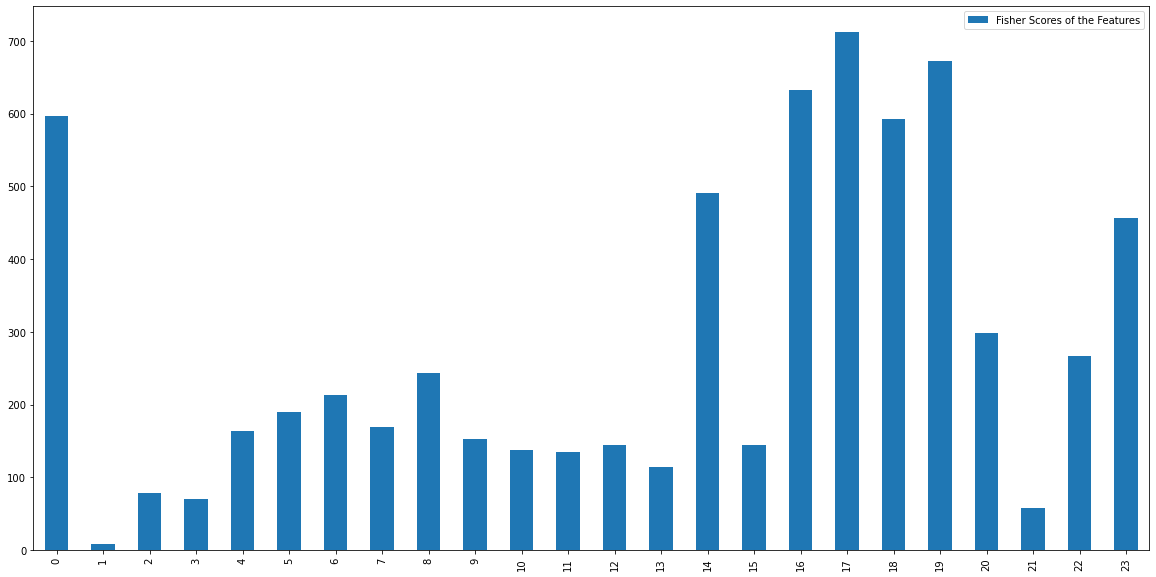

In [37]:
# Similarity Based Feature Selection using Fisher Score 

training_set = df.iloc[:, :(df.shape[1]-1)].values
label_set = df.iloc[:, (df.shape[1]-1):].values

# Get the fisher scores
fisher_scores = fisher_index_calc(training_set, label_set)

# Plot the fisher scores
fig= plt.figure(figsize=(23, 10))
df_fisher = pd.DataFrame({'Fisher Scores of the Features': fisher_scores})
ax = df_fisher.plot.bar(figsize=(20,10))
plt.show()

### What do you infer from the above plot ?

In [38]:
# Perform feature selection by analysing the above plot
# Remove the features that are not significant according to your analysis.

to_remove = []
for i in range((len(fisher_scores))):
    if fisher_scores[i] < 600:
        # we mark for removal
        to_remove.append(i)

df_selected_2 = np.delete(training_set, to_remove, 1)
df_selected_2.shape

(5456, 3)

# Task 3: Model Learning for Classification

Data Preperation for Learning

In [39]:
# Test and Train data splitting
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


labelEn = LabelEncoder()
encoded_labels = labelEn.fit_transform(df['Label'])
class_names = labelEn.classes_

X_train, X_test, y_train, y_test = train_test_split(df_selected_2, encoded_labels, test_size=0.3, shuffle=False)


## Logistic Regression

### Implement your own Logistic Regression 

In [40]:
class LogisticRegression():
    def __init__(self):
        self.losses = []
        self.train_accuracies = []

    def fit(self, x, y, epochs):

        self.weights = np.zeros(x.shape[1])
        self.bias = 0

        for i in range(epochs):
            x_dot_weights = np.matmul(self.weights, x.transpose()) + self.bias
            pred = self._sigmoid(x_dot_weights)
            loss = self.compute_loss(y, pred)
            error_w, error_b = self.compute_gradients(x, y, pred)
            self.update_model_parameters(error_w, error_b)

            pred_to_class = [1 if p > 0.5 else 0 for p in pred]
            self.train_accuracies.append(accuracy_score(y, pred_to_class))
            self.losses.append(loss)

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        y_zero_loss = y_true * np.log(y_pred + 1e-9)
        y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)

    def compute_gradients(self, x, y_true, y_pred):
        # derivative of binary cross entropy
        difference =  y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])

        return gradients_w, gradient_b

    def update_model_parameters(self, error_w, error_b):
        self.weights = self.weights - 0.1 * error_w
        self.bias = self.bias - 0.1 * error_b

    def predict(self, x):
        x_dot_weights = np.matmul(x, self.weights.transpose()) + self.bias
        probabilities = self._sigmoid(x_dot_weights)
        return [1 if p > 0.5 else 0 for p in probabilities]

    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])

    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train, epochs=150)

# Prediction
y_pred = model.predict(X_test)

<AxesSubplot:title={'center':'Confusion matrix For Logistic Regression'}, xlabel='Predicted label', ylabel='True label'>

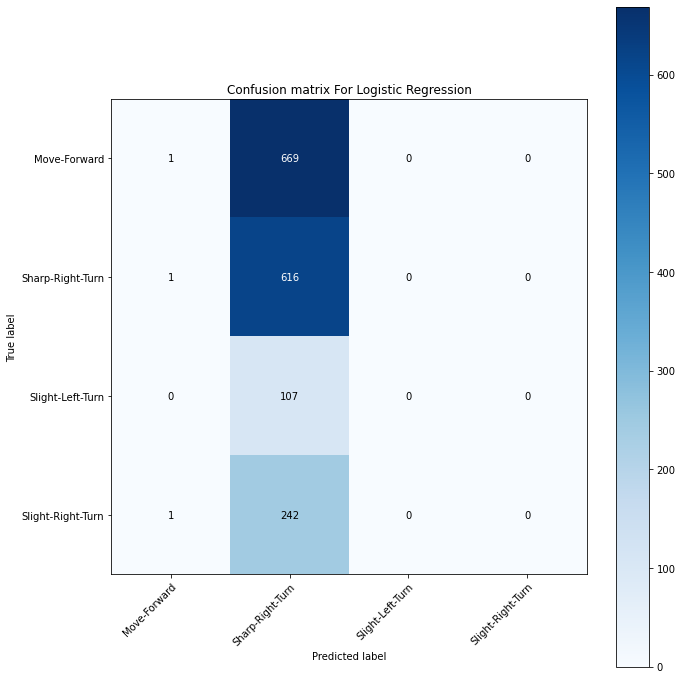

In [42]:
# Plot The confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix For Logistic Regression')

In [43]:
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

Performance - 37.690897984117285%


### Implementation Using standard library

Implement using Sklearn standard library and compare the results

In [44]:
# Import Libraries and define Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C= 86, solver='liblinear', max_iter = 1000, multi_class = 'auto', random_state = 0)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

<AxesSubplot:title={'center':'Confusion matrix For Logistic Regression'}, xlabel='Predicted label', ylabel='True label'>

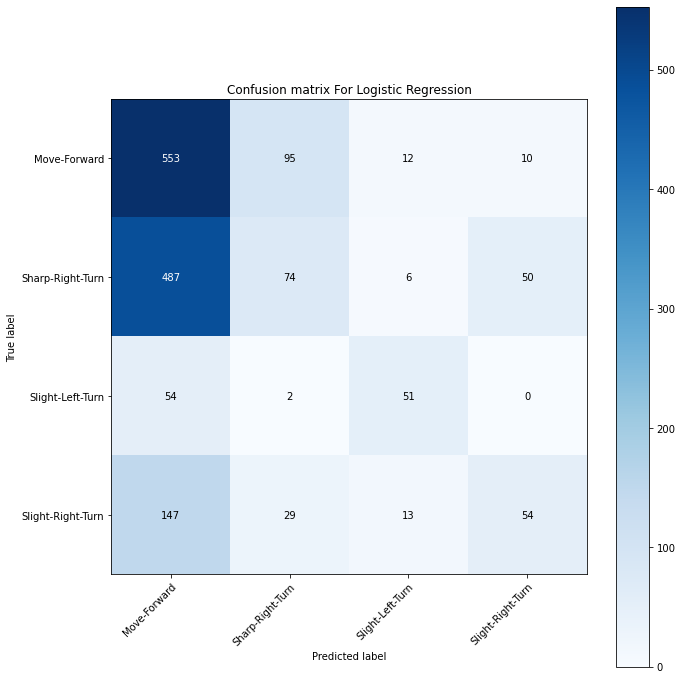

In [45]:
# Plot The confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix For Logistic Regression')

In [46]:
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

Performance - 44.71594379963348%


## Naive Bayes Classifier

### Implement your own Naive Bayes Classifier 

In [47]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [48]:
model = NaiveBayes()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<AxesSubplot:title={'center':'Confusion matrix For Naive Bayes Classifier'}, xlabel='Predicted label', ylabel='True label'>

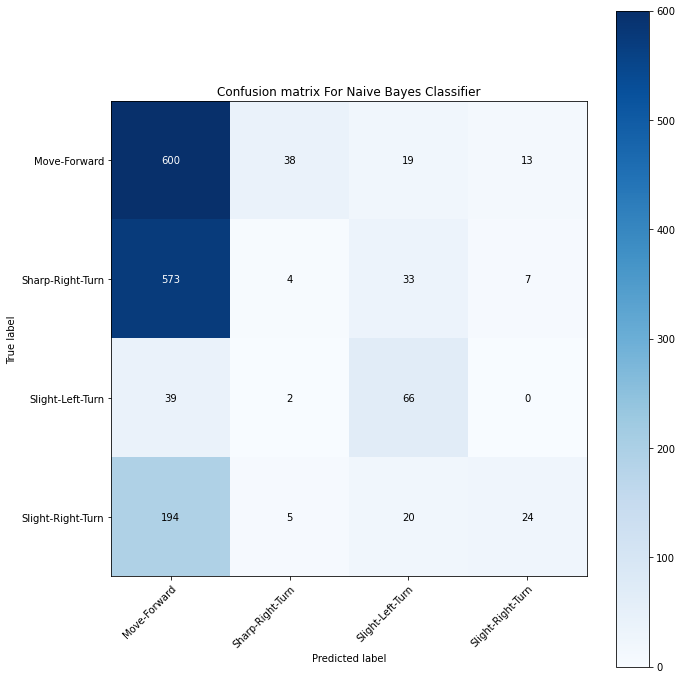

In [49]:
# Plot The confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix For Naive Bayes Classifier')

In [50]:
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

Performance - 42.39462431276726%


### Implementation Using standard library

Implement using Sklearn standard library and compare the results

In [51]:
# Import Libraries and define Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

<AxesSubplot:title={'center':'Confusion matrix For Naive Bayes Classifier'}, xlabel='Predicted label', ylabel='True label'>

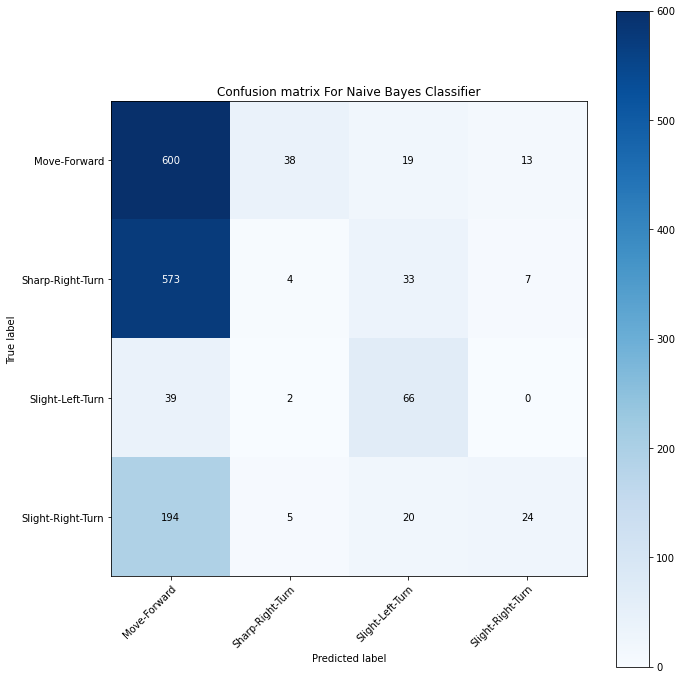

In [52]:
# Plot The confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix For Naive Bayes Classifier')

In [53]:
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

Performance - 42.39462431276726%


## Random Forest Classification

### Implement Random Forest Classifier Using standard library

In [54]:
# Import Libraries and define Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

<AxesSubplot:title={'center':'Confusion matrix For Naive Bayes Classifier'}, xlabel='Predicted label', ylabel='True label'>

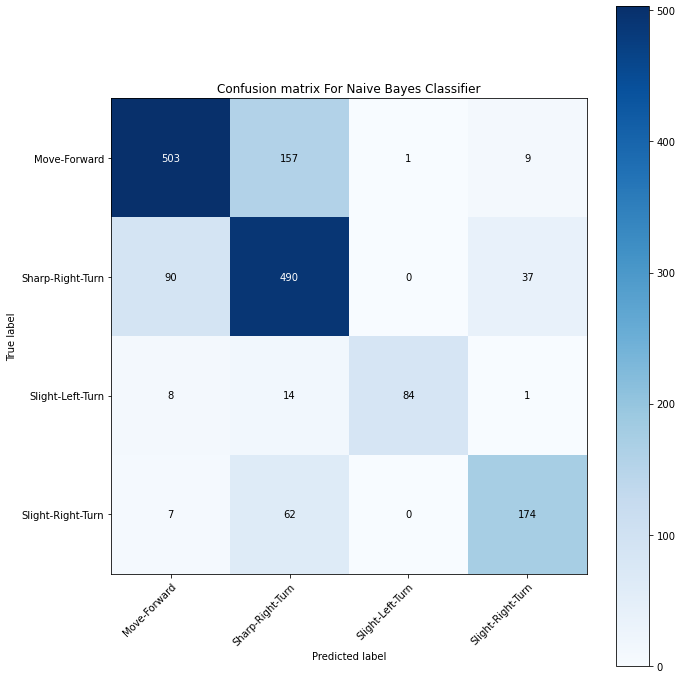

In [55]:
# Plot The confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix For Naive Bayes Classifier')

In [56]:
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

Performance - 76.42028100183262%
